#### **Linear Regression**

https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/

Linear regression is a type of **supervised machine-learning algorithm** that learns from the labelled datasets and **maps the data points with most optimized linear functions** which can be used for **prediction on new datasets**. 

It assumes that there is a **linear relationship between the input and output** hence can be represented by a straight line.

**Problem Analogy :**

**For example** we want to predict a student's exam score based on how many hours they studied. We observe that as students study more hours, their scores go up. In the example of predicting exam scores based on hours studied. Here

- **Independent variable (input)**: Hours studied because it's the factor we control or observe.
- **Dependent variable (output)**: Exam score because it depends on hobw many hours were studied.

We use the independent variable to predict the dependent variable.


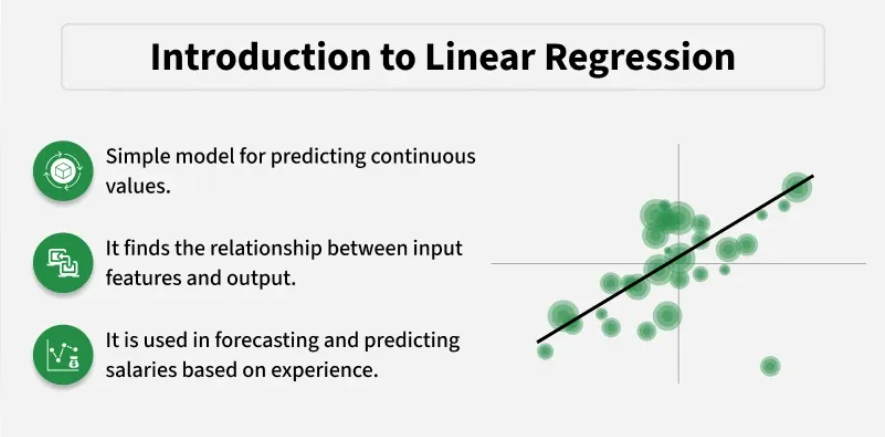

In [1]:
from IPython.display import Image, display
display(Image(filename="photos/LR1.png"))

##### **Best Fit line in Linear Regression**

In linear regression, the best-fit line is the straight line that most accurately represents the relationship between the independent variable (input) and the dependent variable (output). 

It is the line that **minimizes the difference between the actual data points and the predicted values** from the model.

**1. Goal of the Best-Fit Line**

The goal of linear regression is to find a straight line that **minimizes the error** (the difference) between the observed data points and the predicted values. This line helps us predict the dependent variable for new, unseen data.

**2. Equation of the Best-Fit Line**

For simple linear regression (with one independent variable), the best-fit line is represented by the equation :

y = mx + c
- y is the predicted value (dependent variable)
- x is the input (independent variable)
- m is the slope of the line (how much y changes when x changes)
- c is the intercept (the value of y when x = 0)

Objective for the best fit line will be to optimise the values of m and c so that predictive y values are as close as possible to actual data points. 

**3. Minimizing the Error: The Least Squares Method**

To find the best-fit line, we use a method called Least Squares. 
The idea behind this method is to minimize the sum of squared differences between the actual values (data points) and the predicted values from the line. 

This method ensures that the line best represents the data where the sum of the squared differences between the predicted values and actual values is as small as possible.

##### **Assumptions of Linear Regression**

**1. Linearity :** The relationship between inputs (X) and the output (Y) is a straight line.

**2. Normality of Errors:** The errors should follow a normal (bell-shaped) distribution.

**3. No Multicollinearity (for multiple regression):** Input variables shouldn’t be too closely related to each other.

**4. No Autocorrelation:** Errors shouldn't show repeating patterns, especially in time-based data.

**5. Additivity:** The total effect on Y is just the sum of effects from each X, no mixing or interaction between them.'

**Flow of data**

Data --> EDA --> FE --> final data

Final data --> Train and test split

Train --> formula say y = mx + c . 

We start with a random initial value of m & c --> prediction --> error --> gradient 


- y = m1x1 + m2x2
- m1, m2 can have infinte number of values, 
- for each value of m1, m2 we will have a particular value of y(pred) and ultimately we will have a particular value of error and hence loss. 
- If we plot loss for all possible values of m1 , m2, we get a curve which is actually a cost function. 

##### **Cost Function for Linear Regression**

In Linear Regression, the cost function measures how far the predicted values are from the actual values. It helps identify and reduce errors to find the best-fit line. 

The most common cost function used is Mean Squared Error (MSE), which calculates the average of squared differences between actual and predicted values. 

$$
\text{Cost function } (J) = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2
$$
Here,
$$
\hat{y}_i = \theta_1 + \theta_2 x_i
$$

To minimize this cost, we use Gradient Descent, which iteratively updates θ1 and θ2​ until the MSE reaches its lowest value. This ensures the line fits the data as accurately as possible.

https://aero-learn.imperial.ac.uk/vis/Machine%20Learning/gradient_descent_3d.html

Ultimately we want to reduce the loss as much as possible possibly zero, We do this by the method of gradient descent. 

For each value of parameters we get different values of Loss. 

If we plot all the loss values against the parameter values you get a 3D function as shown in above URL. 

Ideally we want to have the lowest possible value of Lowest loss, gradient descent is the method that gives you the values of m0, m1, m2 WHICH GIVES THE LOWEST VALUE OF LOSS

##### **Gradient Descent** : 
It is an optimization technique used to train a linear regression model by minimizing the prediction error. It works by starting with random model parameters and repeatedly adjusting them to reduce the difference between predicted and actual values i.e find the minimum loss. 

**How does Gradient Descent work in Linear Regression?**
1. Initializing Parameters: Start with random initial values for the slope and intercept. 
2. Calculate the Cost Function: Measure the error using the Mean Squared Error (MSE):
3. Compute the Gradient: Calculate how much the cost function changes with respect to m and b. 
4. Update Parameters: Change m and b to reduce the error. 
5. Repeast steps 2-4 until the error stops decreasing significantly. 

Loss + loss function ===> Gradient descent = gradient ====> update values of m0, m1, m2. Find the new loss, give to gradient descent and so on.... keep optimising such that the loss no longer decreases. 

https://www.playwithml.com/concepts/gradient-descent

Goal of Gradient Descent is to find minimum loss. 
- We use differentiation to calculate slope (gradient) of the cost function at our current position
- Slope/gradient will tell us the direction of the steepest ascent (uphill)
- Take a step in the opposite direction i.e. towards steepest descent (downhill)

##### **Practical Intuition of Gradient Descent**

In [2]:
import numpy as np

In [3]:
X = np.array ([
    [1, 1, 0],
    [1, 2, 1],
    [1, 3, 1],
    [1, 4, 2],
    [1, 5, 3],
    [1, 6, 4]
])

y=np.array([39.76, 47.100, 56.978, 68.240, 77.867, 85.022])

#### gradient tells you direction and rate of change 

In [4]:
# Initialise
beta = np.zeros(3) # b0, b1, b2 or m0, m1, m2, 3 is used because we have 3 columns in X above
learning_rate = 0.01 # should be smaller so that you take smaller steps everytime in getting the lowest value of cost function
m = len(y)

In [5]:
print(f'Initial beta : {beta}')

Initial beta : [0. 0. 0.]


In [6]:
# Epoch 1 single step from the initialised values towards something that minimises the cost function
print('=========EPOCH 1======================')

# Step 1 : Compute predictions
y_pred = X @ beta # Maxtric multiplication X * beta
print(f"Predictions : {y_pred}")

# Step 2 : compute errors
errors = y - y_pred
print(f"errors : {y_pred}")

# Step 3 : Compute gradient
gradient = (X.T @ (y_pred - y)) / m ## X.T is x transpose, @ is matrix multiplication, gradient is nothing but loss function. 
print(f"Gradient : {gradient}")

# Step 4 : Update beta
beta = beta - learning_rate * gradient
print(f"Updated beta : {beta}")



# Step 5 : Compute predictions
y_pred = X @ beta # Matrix multiplication X * beta
print(f"Predictions : {y_pred}")

=========EPOCH 1======================
Predictions : [0. 0. 0. 0. 0. 0.]
errors : [0. 0. 0. 0. 0. 0.]
Gradient : [ -62.4945     -246.22016667 -135.70783333]
Updated beta : [0.624945   2.46220167 1.35707833]
Predictions : [ 3.08714667  6.90642667  9.36862833 13.18790833 17.00718833 20.82646833]


In [7]:
# Epoch 1 single step from the initialised values towards something that minimises the cost function
print('=========EPOCH 2======================')

# Step 1 : Compute predictions
y_pred = X @ beta # Maxtric multiplication X * beta
print(f"Predictions : {y_pred}")

# Step 2 : compute errors
errors = y - y_pred
print(f"errors : {y_pred}")

# Step 3 : Compute gradient
gradient = (X.T @ (y_pred - y)) / m ## X.T is x transpose
print(f"Gradient : {gradient}")

# Step 4 : Update beta
beta = beta - learning_rate * gradient
print(f"Updated beta : {beta}")

# Step 5 : Compute predictions
y_pred = X @ beta # Matrix multiplication X * beta
print(f"Predictions : {y_pred}")

=========EPOCH 2======================
Predictions : [ 3.08714667  6.90642667  9.36862833 13.18790833 17.00718833 20.82646833]
errors : [ 3.08714667  6.90642667  9.36862833 13.18790833 17.00718833 20.82646833]
Gradient : [ -50.76387222 -194.92812167 -106.21144833]
Updated beta : [1.13258372 4.41148288 2.41919282]
Predictions : [ 5.54406661 12.37474231 16.78622519 23.61690089 30.44757659 37.27825229]


In [8]:
# Epoch 1 single step from the initialised values towards something that minimises the cost function
print('=========EPOCH 3======================')

# Step 1 : Compute predictions
y_pred = X @ beta # Maxtric multiplication X * beta
print(f"Predictions : {y_pred}")

# Step 2 : compute errors
errors = y - y_pred
print(f"errors : {y_pred}")

# Step 3 : Compute gradient
gradient = (X.T @ (y_pred - y)) / m ## X.T is x transpose
print(f"Gradient : {gradient}")

# Step 4 : Update beta
beta = beta - learning_rate * gradient
print(f"Updated beta : {beta}")

# Step 5 : Compute predictions
y_pred = X @ beta # Maxtric multiplication X * beta
print(f"Predictions : {y_pred}")

=========EPOCH 3======================
Predictions : [ 5.54406661 12.37474231 16.78622519 23.61690089 30.44757659 37.27825229]
errors : [ 5.54406661 12.37474231 16.78622519 23.61690089 30.44757659 37.27825229]
Gradient : [ -41.48653936 -154.3822955   -82.8994153 ]
Updated beta : [1.54744912 5.95530584 3.24818697]
Predictions : [ 7.50275495 16.70624776 22.6615536  31.86504641 41.06853922 50.27203202]


In [9]:
for epoch in range(4, 1000): 
    # Epoch 1 single step from the initialised values towards something that minimises the cost function
    print(f'=========EPOCH {epoch}======================')

    # Step 1 : Compute predictions
    y_pred = X @ beta # Maxtric multiplication X * beta
    print(f"Predictions : {y_pred}")

    # Step 2 : compute errors
    errors = y - y_pred
    print(f"errors : {y_pred}")

    # Step 3 : Compute gradient
    gradient = (X.T @ (y_pred - y)) / m ## X.T is x transpose
    print(f"Gradient : {gradient}")

    # Step 4 : Update beta
    beta = beta - learning_rate * gradient
    print(f"Updated beta : {beta}")

    y_pred = X @ beta # Maxtric multiplication X * beta
    print(f"Predictions : {y_pred}")

=========EPOCH 4======================
Predictions : [ 7.50275495 16.70624776 22.6615536  31.86504641 41.06853922 50.27203202]
errors : [ 7.50275495 16.70624776 22.6615536  31.86504641 41.06853922 50.27203202]
Gradient : [ -34.14847101 -122.33100248  -64.47589335]
Updated beta : [1.88893383 7.17861586 3.8929459 ]
Predictions : [ 9.06754969 20.13911146 27.31772732 38.38928908 49.46085085 60.53241262]
=========EPOCH 5======================
Predictions : [ 9.06754969 20.13911146 27.31772732 38.38928908 49.46085085 60.53241262]
errors : [ 9.06754969 20.13911146 27.31772732 38.38928908 49.46085085 60.53241262]
Gradient : [-28.34334316 -96.99435986 -49.91656334]
Updated beta : [2.17236726 8.14855946 4.39211154]
Predictions : [10.32092672 22.86159772 31.01015718 43.55082818 56.09149918 68.63217017]
=========EPOCH 6======================
Predictions : [10.32092672 22.86159772 31.01015718 43.55082818 56.09149918 68.63217017]
errors : [10.32092672 22.86159772 31.01015718 43.55082818 56.09149918 

In [10]:
print(f'Actual values : {y}')
print(f'Predicted values : {X @ beta}')

Actual values : [39.76  47.1   56.978 68.24  77.867 85.022]
Predicted values : [36.864824   45.31191841 60.00010373 68.44719814 76.89429256 85.34138697]
